In [27]:
from htrc_features import FeatureReader
import numpy as np
import pandas as pd

In [28]:
def get_htrc_page_data(document):
    fr = FeatureReader([document])
    vol = next(fr.volumes())
#     ptc = vol.tokenlist(pos=False, case=False).reset_index().drop(['section'], axis=1)
    ptc = vol.tokenlist(pos=True, case=False).reset_index().drop(['section'], axis=1)
    ptc = ptc[ptc["pos"] == "NN"]
# make it only grab the pos you're interested in- either go into ht or make new cell, vol=
    page_list = set(ptc['page'])
    
    # extract tokens by page 
    tokens=list()
    for page in page_list:
        page_data = str()
        
        # operate on each token
        for page_tokens in ptc.loc[ptc['page'] == page].iterrows():
            if page_tokens[1][1].isalpha():
                
                # deal with frequency count by creating correct number of tokens
                page_data += (' '.join([page_tokens[1][1]] * page_tokens[1][3])) + " "

        tokens.append(page_data.split())
    return tokens

In [29]:
# return bibliographic data
def get_htrc_metadata(document):
    fr = FeatureReader([document])
    vol = next(fr.volumes())
    return([vol.author[0],vol.title,vol.year])

In [30]:
# htids for two classes, 7 training texts each
hard_sf = ["mdp.39015013433738", "mdp.39015025286538", "uc1.32106007713453", "uc1.32106012964117", "mdp.39015020680461", "pst.000029273768", "mdp.39015013517985"]
soft_sf = ["mdp.39015055883048", "mdp.39015040597794", "mdp.49015000529041", "mdp.49015002042977", "mdp.39015020645456", "inu.30000007203650", "mdp.39015054037372"]

In [10]:
# # htids for two classes, ten training texts each
# hard_sf = ["mdp.39015013433738", "mdp.39015025286538", "uc1.32106007713453", "uc1.32106012964117", "mdp.39015020680461", "pst.000029273768", "mdp.39015013517985"]
# soft_sf  = ["mdp.39015055883048", "mdp.39015040597794", "mdp.49015000529041", "mdp.49015002042977", "mdp.39015020645456", "inu.30000007203650", "mdp.39015054037372"]


In [11]:
# # htids for two classes 
# hard_sf = ["mdp.39015038888775", "pst.000027847633", "mdp.39015013517985", "mdp.39015020680461", "mdp.39015020690858", "pst.000029273768", "mdp.39015013433738", "mdp.39015013534014", "mdp.39015012435791", "pst.000059688501"]
# soft_sf = ["mdp.39015020645456", "mdp.39015003922005", "mdp.39015000244775", "mdp.39015047597136",  "mdp.49015000529041",  "mdp.49015003071447", "inu.30000004080028", "mdp.39015005320745", "mdp.39015054037372", "pst.000011824909"]
# # #"ppt.ssfcbz201710000391", "uiug.30112077272364", "ppt.ssfcbz201710000347",
# # # "pst.000011824909", "mdp.39015005320745", "uiug.30112061864242"

In [12]:
# # # htids for two classes [more texts]
# hard_sf = ["mdp.39015038888775", "pst.000027847633", "mdp.39015013517985", "mdp.39015020680461", "mdp.39015020690858", "pst.000029273768", "mdp.39015013433738", "mdp.39015056817003", "mdp.39015012435791", "pst.000059688501", "mdp.39015025252100", "uc1.32106007713453", "uc1.32106012964117", "mdp.39015025286538", "mdp.39015041888606"]
# soft_sf = ["mdp.39015020645456", "mdp.39015003922005", "mdp.39015000244775", "mdp.39015000244775", "pst.000011824909", "mdp.49015000529041", "mdp.39015005320745", "mdp.49015003071447", "inu.30000004080028", "mdp.39015054037372", "mdp.39015040597794", "mdp.39015002289877", "mdp.39015055883048", "inu.30000007203650", "mdp.49015002042977"]

In [31]:
all_texts = hard_sf + soft_sf

In [32]:
# create labels for classifier
labels = ["hard"] * len(hard_sf) + ["soft"] * len(soft_sf)

In [33]:
md = pd.DataFrame([get_htrc_metadata(text) for text in all_texts])
md.columns={"Author","Title","Pub Year"}
md['label'] = labels

In [34]:
md

,Author,Title,Pub Year,label
0,"Clement, Hal, 1922-2003.",Mission of gravity /,1978,hard
1,"Brin, David.",Startide rising /,1988,hard
2,"Lem, Stanisław.",Fiasco /,1987,hard
3,"Clarke, Arthur C. (Arthur Charles), 1917-2008",Rendezvous with Rama /,1973,hard
4,"Clarke, Arthur C. (Arthur Charles), 1917-2008",A fall of moondust.,1961,hard
5,"Niven, Larry.",Ringworld : a novel /,1970,hard
6,"Hoyle, Fred, Sir.",The black cloud /,1960,hard
7,"Card, Orson Scott.",Ender's game /,1991,soft
8,"Keyes, Daniel.","Flowers for Algernon,",1966,soft
9,"Sturgeon, Theodore.",More than human /,1988,soft


In [35]:
# https://www.goodreads.com/list/show/42417.Classic_Science_Fiction_1980_1989
test = ["hvd.32044072365117","pst.000064238685","pst.000022355218","mdp.39015013939874","mdp.39015038888775",
        "mdp.39015027480519","uc1.31822007175888","mdp.39015021474286"] 

testdf = pd.DataFrame([get_htrc_metadata(text) for text in test])
testdf.columns={"Author","Title","Pub Year"}
testdf

,Author,Title,Pub Year
0,"Card, Orson Scott.",Ender's game /,1991
1,"Atwood, Margaret, 1939-",The Handmaid's tale /,2006
2,"Gibson, William, 1948-",Neuromancer /,1986
3,"Adams, Douglas, 1952-2001.",The restaurant at the end of the universe /,1981
4,"Sagan, Carl, 1934-1996.",Contact : a novel /,1985
5,"Moore, Alan, 1953-",Watchmen /,1986
6,"Clarke, Arthur C. (Arthur Charles), 1917-2008","2010, odyssey two /",1982
7,"Brin, David.",The postman /,1985


In [55]:
# new testing set
test = ["mdp.39015025252100", "mdp.39015038888775", "pst.000059688501", "pst.000027847633", "mdp.39015012435791", "pst.000022355218", "mdp.39015000244775", "mdp.39015002969064", "mdp.39015046878727", "uc1.32106010337274", "mdp.39015000611528", "pst.000064238685"] 

testdf = pd.DataFrame([get_htrc_metadata(text) for text in test])
testdf.columns={"Author","Title","Pub Year"}
testdf

,Author,Title,Pub Year
0,"Forward, Robert L.",Dragon's egg /,1980
1,"Sagan, Carl, 1934-1996.",Contact : a novel /,1985
2,"Asimov, Isaac, 1920-1992",Foundation.,1951
3,"Huxley, Aldous, 1894-1963.",Brave new world : a novel by Aldous Huxley.,1932
4,"Anderson, Poul, 1926-2001.",Tau zero /,1970
5,"Gibson, William, 1948-",Neuromancer /,1986
6,"Le Guin, Ursula K., 1929-2018.",The dispossessed; an ambiguous Utopia,1975
7,"Lem, Stanisław.",Solaris.,1970
8,"Butler, Octavia E.",Patternmaster /,1976
9,"Tepper, Sheri S.",Grass /,1990


In [42]:
# construct text for consumption into dtm
raw_data = list()
for doc in hard_sf + soft_sf:
    page_data = get_htrc_page_data(doc)
    tokens = ' '.join([w for p in page_data for w in p])
    raw_data.append(tokens)

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(input='content',
                             stop_words='english',
                             strip_accents='unicode')

In [44]:
dtm = vec.fit_transform(raw_data)

In [45]:
dtm.shape
# large sparse matrix: 17,41229

(14, 11218)

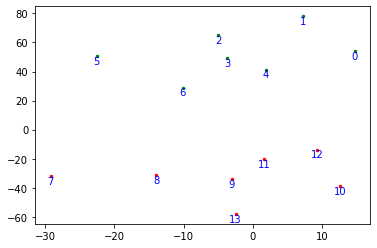

In [46]:
# T-SNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# fig = plt.figure(figsize=(35, 20), dpi=75)
plot = TSNE(n_components=2, learning_rate='auto',
            init='random', 
            perplexity=3).fit_transform(dtm)


for i,[x, y, label,htid] in enumerate(zip(plot[:,0], plot[:,1], labels,all_texts)):

    
# for x, y, label,htid in zip(plot[:,0], plot[:,1], labels,all_texts):
    
    # enumerate, for i in {zip}
    
    if label == "hard":
        plt.scatter(x, y, c='green',s=6)
    else:
        plt.scatter(x, y, c='red',s=6)
    plt.text(x, y, i, c='blue', ha='center', va='top')

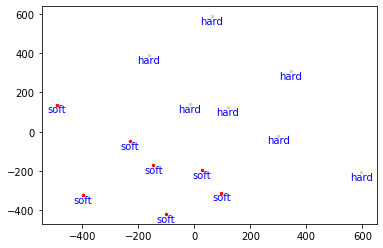

In [47]:
# MDS

# fig = plt.figure(figsize=(35, 20), dpi=75)

from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=1)
plot = mds.fit_transform(dtm.toarray())
for x, y, label,htid in zip(plot[:,0], plot[:,1], labels,all_texts):
    if label == "hard":
        plt.scatter(x, y, c='lightgrey',s=6)
    else:
        plt.scatter(x, y, c='red',s=6)
    plt.text(x, y, label, c='blue', ha='center', va='top')

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn import metrics

clf = SGDClassifier(tol=None,max_iter=1000,random_state=42).fit(dtm,labels)

<AxesSubplot:title={'center':'Key Features: Hard'}>

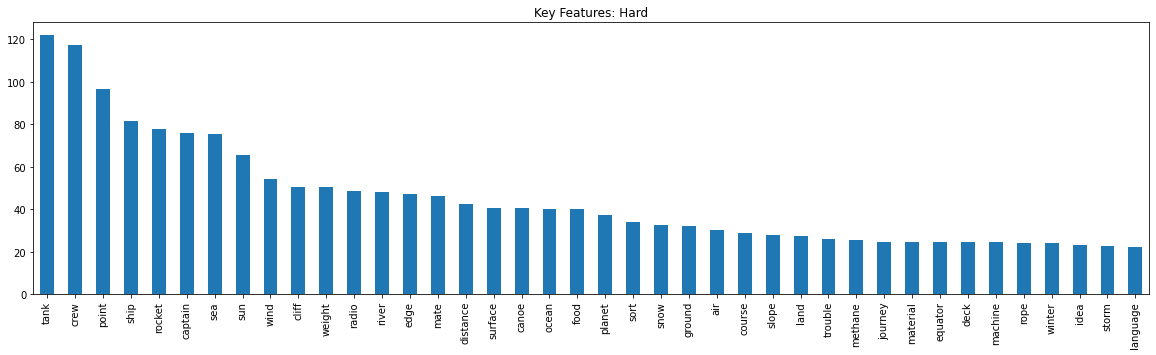

In [49]:
df = pd.DataFrame([clf.coef_[0][idx] for idx in np.argsort(clf.coef_[0])[::-1][:40]],
                  index = [vec.get_feature_names_out()[idx] for idx in np.argsort(clf.coef_[0])[:40]])
df.plot(figsize=(20, 5),kind='bar',title='Key Features: Hard',legend=False)

# would be interesting to remove things like character names/spec pos tags 
# expand collections 
# semantic meaning: presence of word/repetitions

<AxesSubplot:title={'center':'Key Features: Soft'}>

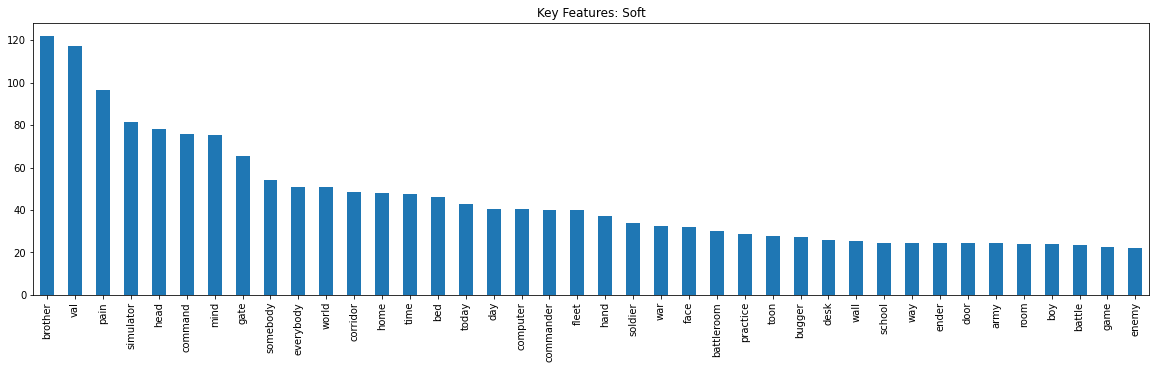

In [53]:
df = pd.DataFrame([clf.coef_[0][idx] for idx in np.argsort(clf.coef_[0])[::-1][:40]],
                  index = [vec.get_feature_names_out()[idx] for idx in np.argsort(clf.coef_[0])[11218-40:11218]])
df.plot(figsize=(20, 5),kind='bar',title='Key Features: Soft',legend=False)

In [54]:
# construct text for consumption into dtm
test_data = list()
for doc in test:
    page_data = get_htrc_page_data(doc)
    tokens = ' '.join([w for p in page_data for w in p])
    test_data.append(tokens)
test_dtm = vec.transform(test_data)

In [56]:
predicted_labels = clf.predict(test_dtm)
testdf['Predict'] = predicted_labels
testdf

,Author,Title,Pub Year,Predict
0,"Forward, Robert L.",Dragon's egg /,1980,hard
1,"Sagan, Carl, 1934-1996.",Contact : a novel /,1985,soft
2,"Asimov, Isaac, 1920-1992",Foundation.,1951,soft
3,"Huxley, Aldous, 1894-1963.",Brave new world : a novel by Aldous Huxley.,1932,soft
4,"Anderson, Poul, 1926-2001.",Tau zero /,1970,soft
5,"Gibson, William, 1948-",Neuromancer /,1986,soft
6,"Le Guin, Ursula K., 1929-2018.",The dispossessed; an ambiguous Utopia,1975,soft
7,"Lem, Stanisław.",Solaris.,1970,soft
8,"Butler, Octavia E.",Patternmaster /,1976,soft
9,"Tepper, Sheri S.",Grass /,1990,soft
